# Upload Dataset

In [2]:
%pip install scikit-learn
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install numpy
%pip install scipy
%pip install statsmodels

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/5b/be/208f17ce87a5e55094b0e8ffd55b06919ab9b56e7e4ce2a64cd9095ec5d2/scikit_learn-1.4.0-1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for numpy<2.0,>=1.19.5 from https://files.pythonhosted.org/packages/5a/62/007b63f916aca1d27f5fede933fda3315d931ff9b2c28b9c2cf388cd8edb/numpy-1.26.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 262.0 kB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for scipy>=1.6.0 from https://files.pythonhosted.org/packages/6b/d4/d62ce38ba00dc67d7ec4ec5cc19d36958d8ed70e63778715ad626bcbc796/scipy-1.11.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 254.6 kB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for joblib>=1.2.0 from https://files

In [3]:
from SCRIPTS.A_data_collection import make_dataset_for_regression
#The number of informative features, i.e., the number of features used to build the linear model used to generate the output.
X, y = make_dataset_for_regression(n_samples=1000, n_features=10, n_informative=5, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.0, seed=2023)
print(X.shape)
print(y.shape)

(1000, 10)
(1000,)


# Data analysis
Try to understand duplicates, range of values, functional dependencies

In [4]:
import pandas as pd

df = pd.DataFrame(X)
print(df.head())

          0         1         2         3         4         5         6  \
0 -1.687523  1.162717 -0.533602 -0.628703 -0.829337  0.042886  0.344324   
1 -1.020632 -0.220116 -0.869748  1.966181  0.835520 -0.296532  0.869868   
2  0.523867 -1.125007  0.085100  0.323081  0.598603  2.014563  0.827047   
3 -0.762037  0.471784 -0.558538 -0.813294  0.039496 -0.577744  0.756322   
4 -0.082485 -1.466384 -0.212735 -1.422577 -1.848497 -0.464045  1.178404   

          7         8         9  
0  0.724020 -1.314765 -0.475478  
1  0.196561  0.281992 -0.401782  
2  0.397878 -0.820872 -0.063909  
3  0.423918  0.886604 -2.272658  
4 -1.065657 -1.367547 -2.501120  


In [5]:
df.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8    float64
9    float64
dtype: object

### Single column analysis

In [6]:
distinct_values=df[0].nunique()
print(distinct_values)

1000


In [7]:
mean_values = df.mean()
std_values = df.std()

print("Mean values:")
print(mean_values)

print("Standard deviation values:")
print(std_values)


Mean values:
0    0.005780
1   -0.031556
2   -0.016019
3    0.036449
4   -0.023135
5   -0.001820
6   -0.026303
7    0.007726
8    0.018629
9    0.092134
dtype: float64
Standard deviation values:
0    0.991113
1    0.975035
2    0.982018
3    1.023308
4    0.966829
5    1.022371
6    0.987888
7    0.972030
8    1.026852
9    1.001554
dtype: float64


# Data pollution

## Generate a complete random pollution function

In [8]:

# List of names
names = ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace', 'Henry', 'Ivy', 'Jack','John', 'Kate', 'Larry', 'Michael', 'Nancy', 'Oliver', 'Pete', 'Robert', 'Susan', 'Tom']

# List of surnames
surnames = ['Smith', 'Johnson', 'Williams', 'Jones', 'Brown', 'Davis', 'Miller', 'Wilson', 'Moore', 'Taylor']


In [9]:
import pandas as pd
import numpy as np
import random

def random_pollution(dataset, percentage):
    polluted_dataset = dataset.copy()
    num_features_affected = int(len(dataset.columns) * percentage)
    random_indices = np.random.choice(len(dataset.columns), num_features_affected, replace=False)

    for idx in random_indices:
        column_name = dataset.columns[idx]
        #if data_type == 'numeric':
        if np.issubdtype(dataset[column_name].dtype, np.number):
            # Convert numeric feature to categorical or boolean
            prob= np.random.rand()
            if prob < 0.2:
                polluted_dataset[column_name] = np.random.choice(['red', 'green', 'blue','purple','orange','yellow','grey','white','black','pink'], size=len(dataset))
            elif prob < 0.4:
                polluted_dataset[column_name] = np.random.choice([True, False], size=len(dataset))
            elif prob < 0.6:
                polluted_dataset[column_name] = np.random.choice(names, size=len(dataset))
            elif prob < 0.8:
                polluted_dataset[column_name] = np.random.choice(100, size=len(dataset))
            else:
                polluted_dataset[column_name] = np.random.choice(surnames, size=len(dataset))

    return polluted_dataset

polluted_dataset = random_pollution(df, 0.5)
print(polluted_dataset.head())

          0         1         2         3   4       5         6   7         8  \
0 -1.687523  1.162717 -0.533602 -0.628703  24  Miller  0.344324  83    Miller   
1 -1.020632 -0.220116 -0.869748  1.966181  98   Moore  0.869868  96     Jones   
2  0.523867 -1.125007  0.085100  0.323081  30   Jones  0.827047  22     Davis   
3 -0.762037  0.471784 -0.558538 -0.813294  98  Miller  0.756322  70  Williams   
4 -0.082485 -1.466384 -0.212735 -1.422577  71   Smith  1.178404  77  Williams   

        9  
0   Jones  
1   Smith  
2   Smith  
3   Davis  
4  Wilson  


## Generate a pollution function according dataset values

In [10]:
def map_value_to_color(value):
    if value >= 0 and value < 0.1:
        return 'blue'
    elif value >= 0.1 and value < 0.2:
        return 'red'
    # Add more conditions for other ranges and corresponding colors
    elif value >= 0.2 and value < 0.3:
        return 'green'
    elif value >= 0.3 and value < 0.4:
        return 'purple'
    elif value >= 0.4 and value < 0.5:
        return 'yellow'
    elif value >= 0.5 and value < 0.6:
        return 'orange'
    elif value >= 0.6 and value < 0.7:
        return 'pink'
    elif value >= 0.7 and value < 0.8:
        return 'grey'
    elif value >= 0.8 and value < 0.9:
        return 'white'
    else:
        return 'black'


In [11]:
def map_value_to_name(value):
    if value >= 0 and value < 0.2:
        return 'Alice'
    elif value >= 0.2 and value < 0.4:
        return 'Charlie'
    elif value >= 0.4 and value < 0.6:
        return 'David'
    elif value >= 0.6 and value < 0.8:
        return 'Eve'
    else:
        return 'Frank'

In [12]:
def map_to_boolean(value):
    if value >= 0 and value < 0.5:
        return True
    else:
        return False

In [13]:
def map_to_surname(value):
    if value >= 0 and value < 0.2:
        return 'Smith'
    elif value >= 0.2 and value < 0.4:
        return 'Johnson'
    elif value >= 0.4 and value < 0.6:
        return 'Williams'
    elif value >= 0.6 and value < 0.8:
        return 'Jones'
    else:
        return 'Brown'

In [14]:
num=0.145
print(int(round(num, 2)*100))

14


In [15]:
def map_to_integer(value):
    return int(round(value, 2)*100)

Scaling values before injecting pollution is crucial as it aids in the construction of the pollution function because I want to ensure that the function behaves consistently across different ranges of values. If data isn't scaled, the same amount of "pollution" could have a big impact on smaller values and a small impact on larger values. This could lead to inconsistent results and make it harder to understand the effects of the pollution.

In [16]:
from sklearn.preprocessing import MinMaxScaler
def range_based_pollution(dataset, percentage):
    num_features_affected = int(len(dataset.columns) * percentage)
    random_indices = np.random.choice(len(dataset.columns), num_features_affected, replace=False)
    random_indices = np.sort(random_indices)
    # Copy the dataset to avoid modifying the original dataset
    polluted_dataset = dataset.copy()

    # Scale only the columns in random_indices
    scaler=MinMaxScaler()
    columns_to_scale = polluted_dataset.columns[random_indices]
    polluted_dataset[columns_to_scale] = scaler.fit_transform(polluted_dataset[columns_to_scale])

    name_counter = 1
    surname_counter = 1
    names_columns = []
    surnames_columns = []

    for idx in random_indices:
        # Generate an integer random number between 0 and 3
        random_number = random.randint(0, 4)
        column = polluted_dataset.columns[idx]
        if random_number == 0:
            polluted_dataset[column] = polluted_dataset[column].apply(map_value_to_color)
        elif random_number == 1:
            new_column_name = 'names' + str(name_counter)
            polluted_dataset[column] = polluted_dataset[column].apply(map_value_to_name)
            polluted_dataset.rename(columns={column: new_column_name}, inplace=True)
            names_columns.append(new_column_name)
            name_counter += 1
        elif random_number == 2:
            polluted_dataset[column] = polluted_dataset[column].apply(map_to_boolean)
        elif random_number == 3:
            polluted_dataset[column] = polluted_dataset[column].apply(map_to_integer)
        else:
            new_column_name = 'surnames' + str(surname_counter)
            polluted_dataset[column] = polluted_dataset[column].apply(map_to_surname)
            polluted_dataset.rename(columns={column: new_column_name}, inplace=True)
            surnames_columns.append(new_column_name)
            surname_counter += 1
        
    print(polluted_dataset.dtypes)

    if names_columns and surnames_columns:
        # Concatenate all 'names' columns together
        polluted_dataset['names'] = polluted_dataset[names_columns].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
        
        # Concatenate all 'surnames' columns together
        polluted_dataset['surnames'] = polluted_dataset[surnames_columns].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
        
        # Create 'full_name' column by concatenating 'names' and 'surnames' columns
        polluted_dataset['full_name'] = polluted_dataset['names'] + ' ' + polluted_dataset['surnames']
        
    return polluted_dataset

polluted_dataset = range_based_pollution(df, 0.3)
print(polluted_dataset.head())

names1     object
1         float64
2         float64
3            bool
4            bool
5         float64
6         float64
7         float64
8         float64
9         float64
dtype: object
    names1         1         2      3      4         5         6         7  \
0  Charlie  1.162717 -0.533602   True   True  0.042886  0.344324  0.724020   
1  Charlie -0.220116 -0.869748  False  False -0.296532  0.869868  0.196561   
2    David -1.125007  0.085100  False  False  2.014563  0.827047  0.397878   
3  Charlie  0.471784 -0.558538   True  False -0.577744  0.756322  0.423918   
4    David -1.466384 -0.212735   True   True -0.464045  1.178404 -1.065657   

          8         9  
0 -1.314765 -0.475478  
1  0.281992 -0.401782  
2 -0.820872 -0.063909  
3  0.886604 -2.272658  
4 -1.367547 -2.501120  


## Statistics of the polluted dataset

In [17]:
for idx in range(len(polluted_dataset.columns)):
    print(polluted_dataset.iloc[:, idx].value_counts())
    distinct_values = (polluted_dataset.iloc[:, idx].nunique())
    print(distinct_values)
    if distinct_values < 15:
        print(polluted_dataset.iloc[:, idx].value_counts())
    else:
        print("Too many distinct values to print")
    uniqueness = distinct_values / len(polluted_dataset)
    print("Uniqueness: ", uniqueness)
    print ('min:', polluted_dataset.iloc[:, idx].min())
    print ('max:', polluted_dataset.iloc[:, idx].max())
    print ('mode:', polluted_dataset.iloc[:, idx].mode()[0])

names1
David      485
Charlie    246
Eve        222
Alice       27
Frank       20
Name: count, dtype: int64
5
names1
David      485
Charlie    246
Eve        222
Alice       27
Frank       20
Name: count, dtype: int64
Uniqueness:  0.005
min: Alice
max: Frank
mode: David
1
 1.162717    1
-1.122683    1
-0.031318    1
 0.361788    1
-1.313228    1
            ..
-0.569984    1
 0.071970    1
 0.308531    1
 0.766043    1
 0.042814    1
Name: count, Length: 1000, dtype: int64
1000
Too many distinct values to print
Uniqueness:  1.0
min: -3.702650734489273
max: 3.4570878539816565
mode: -3.702650734489273
2
-0.533602    1
-0.339426    1
-1.270515    1
 0.350229    1
-0.079330    1
            ..
 0.247250    1
 1.868609    1
-0.529002    1
-0.483982    1
 0.775350    1
Name: count, Length: 1000, dtype: int64
1000
Too many distinct values to print
Uniqueness:  1.0
min: -2.7560789184319727
max: 3.412176776324521
mode: -2.7560789184319727
3
False    543
True     457
Name: count, dtype: int64
2


In [18]:
#import libraries and set up
import seaborn as sns

sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))

### Statistics of injected value

names1
David      485
Charlie    246
Eve        222
Alice       27
Frank       20
Name: count, dtype: int64


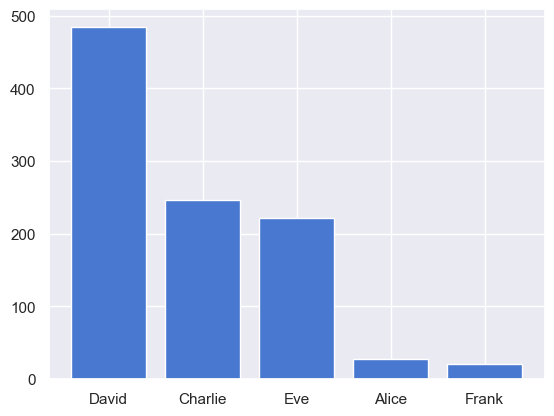

3
False    543
True     457
Name: count, dtype: int64


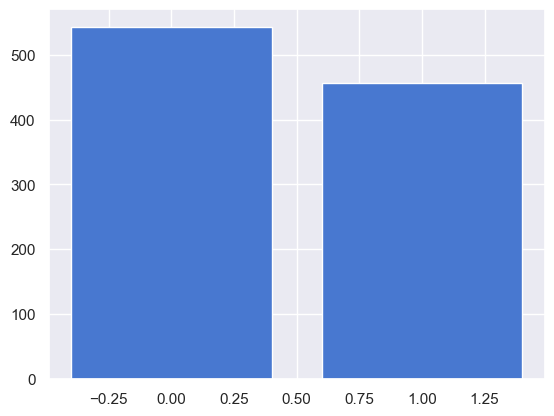

4
False    605
True     395
Name: count, dtype: int64


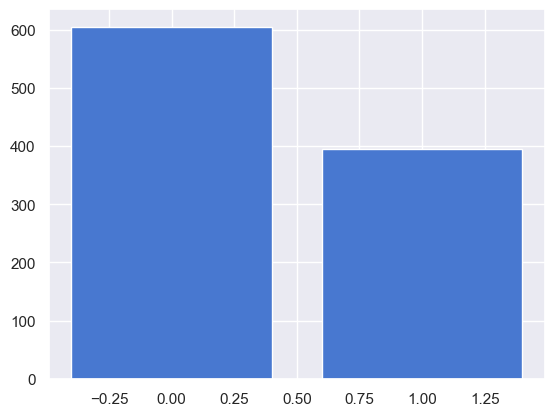

In [19]:
import matplotlib.pyplot as plt

# Loop over each column
for column_name in polluted_dataset.columns:
    # Check if the column is non-numeric
    if not np.issubdtype(polluted_dataset[column_name].dtype, np.number):
        # Get the counts of each unique value in the column
        value_counts = polluted_dataset[column_name].value_counts()
        print(value_counts)
        # Create a bar plot of the counts
        plt.bar(value_counts.index, value_counts.values)

        # Show the plot
        plt.show()


These values reflect the value distribution shown below

### Statistics of numerical value

1
 1.162717    1
-1.122683    1
-0.031318    1
 0.361788    1
-1.313228    1
            ..
-0.569984    1
 0.071970    1
 0.308531    1
 0.766043    1
 0.042814    1
Name: count, Length: 1000, dtype: int64


2
-0.533602    1
-0.339426    1
-1.270515    1
 0.350229    1
-0.079330    1
            ..
 0.247250    1
 1.868609    1
-0.529002    1
-0.483982    1
 0.775350    1
Name: count, Length: 1000, dtype: int64
5
 0.042886    1
 0.849099    1
-0.213393    1
 0.130175    1
-2.248118    1
            ..
-0.747281    1
-0.467083    1
 1.200599    1
-1.224057    1
 0.514210    1
Name: count, Length: 1000, dtype: int64
6
 0.344324    1
-1.040190    1
 0.748504    1
 0.862092    1
-1.246897    1
            ..
-0.009006    1
-1.411160    1
 0.799744    1
 1.752756    1
-0.568916    1
Name: count, Length: 1000, dtype: int64
7
 0.724020    1
-2.976033    1
-0.426767    1
-0.154616    1
 1.349368    1
            ..
-0.092178    1
 0.227816    1
 0.883751    1
-0.442734    1
-0.162490    1
Name: count, Length: 1000, dtype: int64
8
-1.314765    1
-0.345546    1
 1.236674    1
 1.036137    1
 0.947681    1
            ..
-0.437293    1
 0.598048    1
 0.170506    1
 0.613495    1
 0.716665    1
Name:

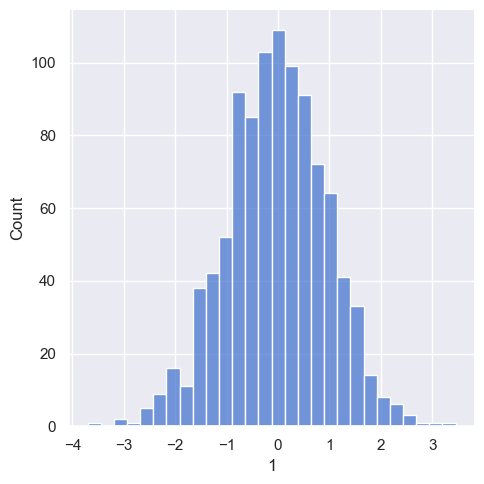

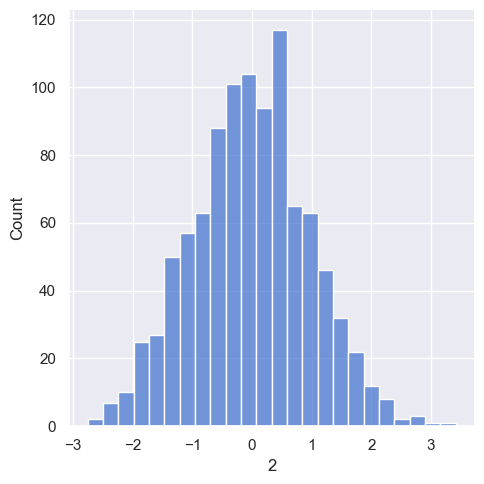

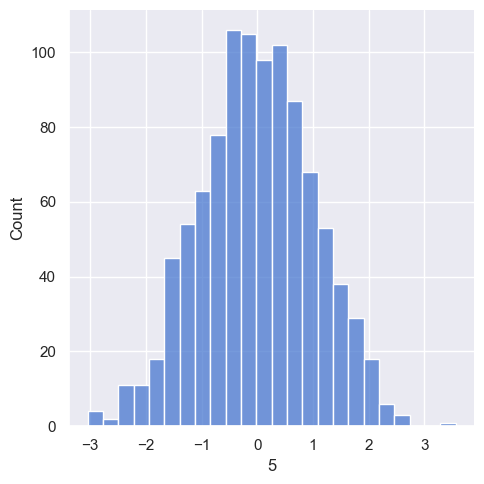

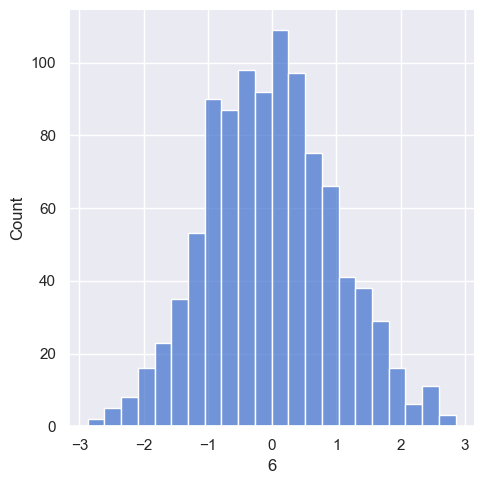

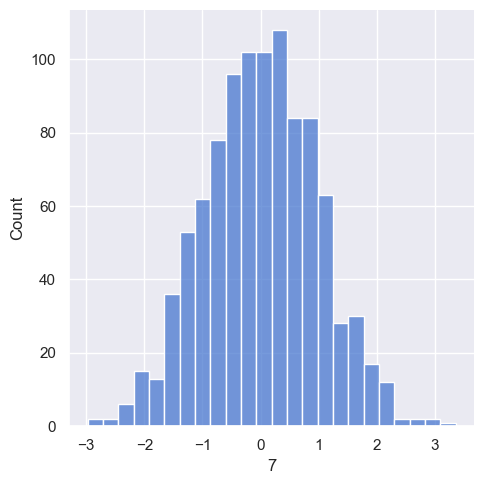

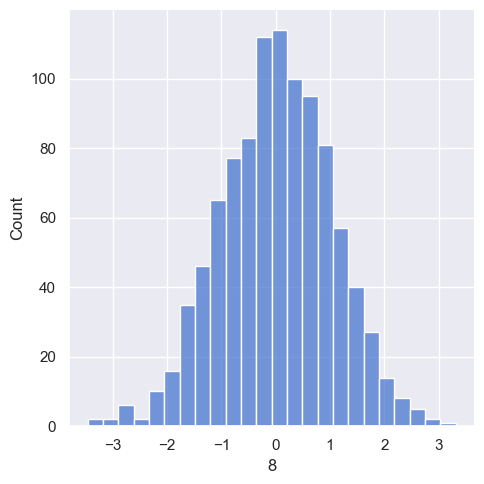

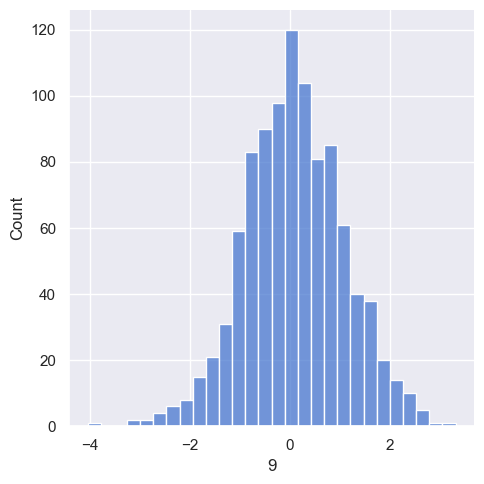

In [20]:
# Loop over each column
for column_name in polluted_dataset.columns:
    # Check if the column is non-numeric
    if np.issubdtype(polluted_dataset[column_name].dtype, np.number):
        value_counts = polluted_dataset[column_name].value_counts()
        print(value_counts)
        # Create a histogram of the column values
        sns.displot(polluted_dataset[column_name])


# Regression

Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for GPRegressor...
Training for GPRegressor...
Training for GPRegressor...
Training for GPRegressor...
Training for GPRegressor...
Training for GPRegressor...
Training for GPRegressor...
Training for GPRegressor...
Training for GPRegressor...
Training for GPRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for 

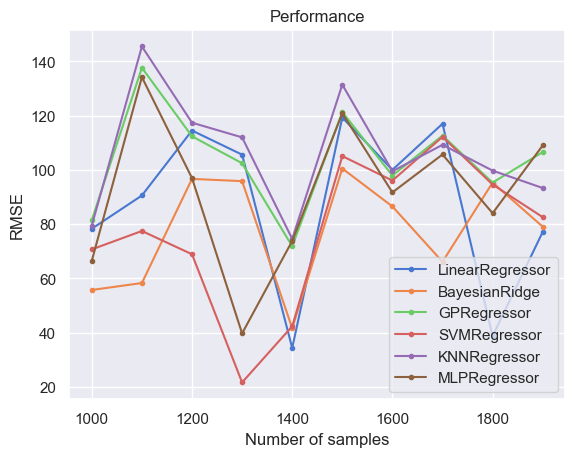

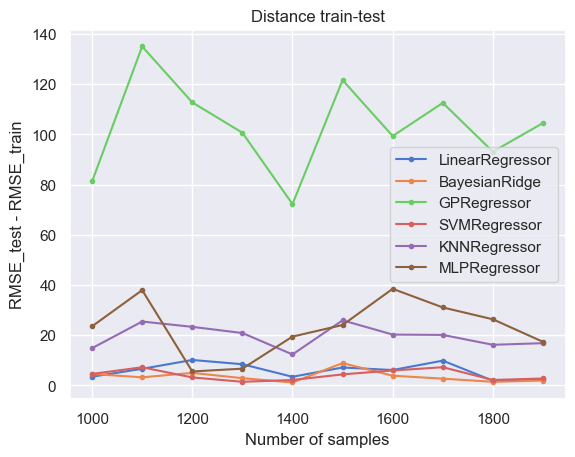

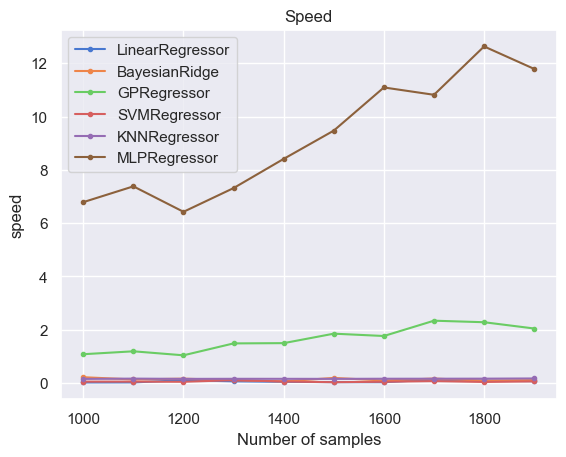

In [21]:
from SCRIPTS.D_data_analysis import regression, encoding_categorical_variables
from SCRIPTS.E_plot_results import plot

# REGRESSION EXAMPLE
    # (in this toy example, I simply created 10 datasets with respectively 1000,1001,1002,1003,1004,1005,1006,1007,1008,1009 number of samples
    # and I generated the three plots for the evaluation of the results)
results_for_each_algorithm = []
REGRESSION_ALGORITHMS = ["LinearRegressor","BayesianRidge","GPRegressor","SVMRegressor","KNNRegressor","MLPRegressor"]
SEED = 2023
for algorithm in REGRESSION_ALGORITHMS:  # FIRST CICLE ON THE ALGORITHMS

    results_single_algorithm = []

    for i in range(0,10):  # SECOND CICLE ON THE NUMBER OF POLLUTED DATASET THAT YOU WANT TO CREATE WITH DIFFERENT % OF POLLUTION
        # DATA COLLECTION
        X, y = make_dataset_for_regression(n_samples=1000+i*100, n_features=12, n_informative=4, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=20.0, seed=2023)
        # DATA POLLUTION
        df = pd.DataFrame(X)
        # df = random_pollution(df, 0.3)
        df = random_pollution(df, 0.6)
        df.columns = df.columns.astype(str)
        df = encoding_categorical_variables(df)
        # DATA ANALYSIS
        results_1_analysis = regression(df, y, algorithm, SEED)
        results_single_algorithm.append(results_1_analysis)

    results_for_each_algorithm.append(results_single_algorithm)

# RESULTS EVALUATION
# EXAMPLE FOR USING THE SCRIPTS TO PLOT THE RESULTS
x_axis_values = [1000 + i * 100 for i in range(10)]
print(x_axis_values)

plot(x_axis_values, x_label="Number of samples", results=results_for_each_algorithm,title="Performance", algorithms=REGRESSION_ALGORITHMS, plot_type="performance")
plot(x_axis_values, x_label="Number of samples", results=results_for_each_algorithm,title="Distance train-test", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values, x_label="Number of samples", results=results_for_each_algorithm,title="Speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed")


In [22]:
import pandas as pd

# Flatten the list of dictionaries and add algorithm name
flattened_results = []
for algorithm, results in zip(REGRESSION_ALGORITHMS, results_for_each_algorithm):
    for result in results:
        result['algorithm'] = algorithm
        flattened_results.append(result)

# Convert flattened results into a DataFrame
results_df = pd.DataFrame(flattened_results)
results_df

,mean_perf,distance,speed,algorithm
0,78.304818,3.468789,0.019815,LinearRegressor
1,90.560937,6.613384,0.021764,LinearRegressor
2,114.500442,10.133574,0.103051,LinearRegressor
3,105.602159,8.442586,0.063007,LinearRegressor
4,34.382676,3.436552,0.044158,LinearRegressor
5,119.287797,7.136695,0.030925,LinearRegressor
6,100.008702,6.121289,0.029362,LinearRegressor
7,116.999262,9.870950,0.127133,LinearRegressor
8,38.774130,1.868299,0.086597,LinearRegressor
9,77.118775,2.573957,0.068990,LinearRegressor


In [23]:
# Calculate the average of each column for each algorithm
average_results = results_df.groupby('algorithm').mean()
average_results

,mean_perf,distance,speed
algorithm,,,
BayesianRidge,77.577832,3.561922,0.132145
GPRegressor,103.949993,103.333205,1.656396
KNNRegressor,106.209579,19.615227,0.158623
LinearRegressor,87.553970,5.966608,0.059480
MLPRegressor,92.243334,23.051831,9.211754
SVMRegressor,77.160437,4.107857,0.055190
